## <b> <span style='color:#2ae4f5'>|</span> Rice Variety Classification and Quality Evaluation Using Image Analysis </b> 

## <b>1 <span style='color:#2ae4f5'>|</span> Introduction </b> 
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''>1.1 |</span></b> Rice Variety Classification and Quality Evaluation Using Image Analysis </b></p>
</div>
        
Rice, as one of the most prevalent grain crops globally, exhibits significant genetic diversity, resulting in various rice varieties. These varieties exhibit variations in essential characteristics such as **texture**, **shape**, and **color**. By harnessing these differentiating features, it becomes possible to accurately classify and assess the quality of rice seeds.

This research initiative aims to **develop a robust image analysis system** capable of automatically identifying and categorizing different rice varieties based on their visual attributes. By employing advanced **machine learning techniques** and **deep neural networks**, the project endeavors to create a model that can accurately classify rice samples into the five target varieties.

Additionally, the developed **image analysis model** can contribute to the broader field of **computer vision** and **pattern recognition**. The insights gained from this research can be applied to other **grain crops** and **agricultural products**, leading to advancements in **automated classification** and quality evaluation across various agricultural domains.

In summary, the **Rice Variety Classification and Quality Evaluation project** utilizes a comprehensive dataset of 75,000 rice images to develop a state-of-the-art image analysis system. By accurately classifying and evaluating the quality attributes of five distinct rice varieties, this research aims to enhance rice production processes, support seed selection, and drive advancements in computer vision for agricultural applications. For more information about the dataset use the following Kaggle link:
https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset


## <b>2 <span style='color:#2ae4f5'>|</span> Import Libraries </b> 

In [1]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

## <b>3 <span style='color:#2ae4f5'>|</span> Create a dataframe with the Images and Label </b> 

In [2]:
# Set the path to the dataset
dataset_path = 'Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

## <b>4 <span style='color:#2ae4f5'>|</span> Visualization of Dataset </b> 

In [3]:
df.head()

,image,label
0,Rice_Image_Dataset\Arborio\Arborio (1).jpg,Arborio
1,Rice_Image_Dataset\Arborio\Arborio (10).jpg,Arborio
2,Rice_Image_Dataset\Arborio\Arborio (100).jpg,Arborio
3,Rice_Image_Dataset\Arborio\Arborio (1000).jpg,Arborio
4,Rice_Image_Dataset\Arborio\Arborio (10000).jpg,Arborio


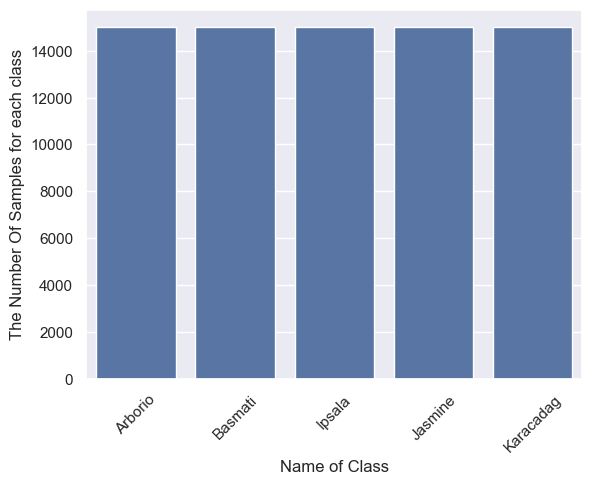

In [4]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

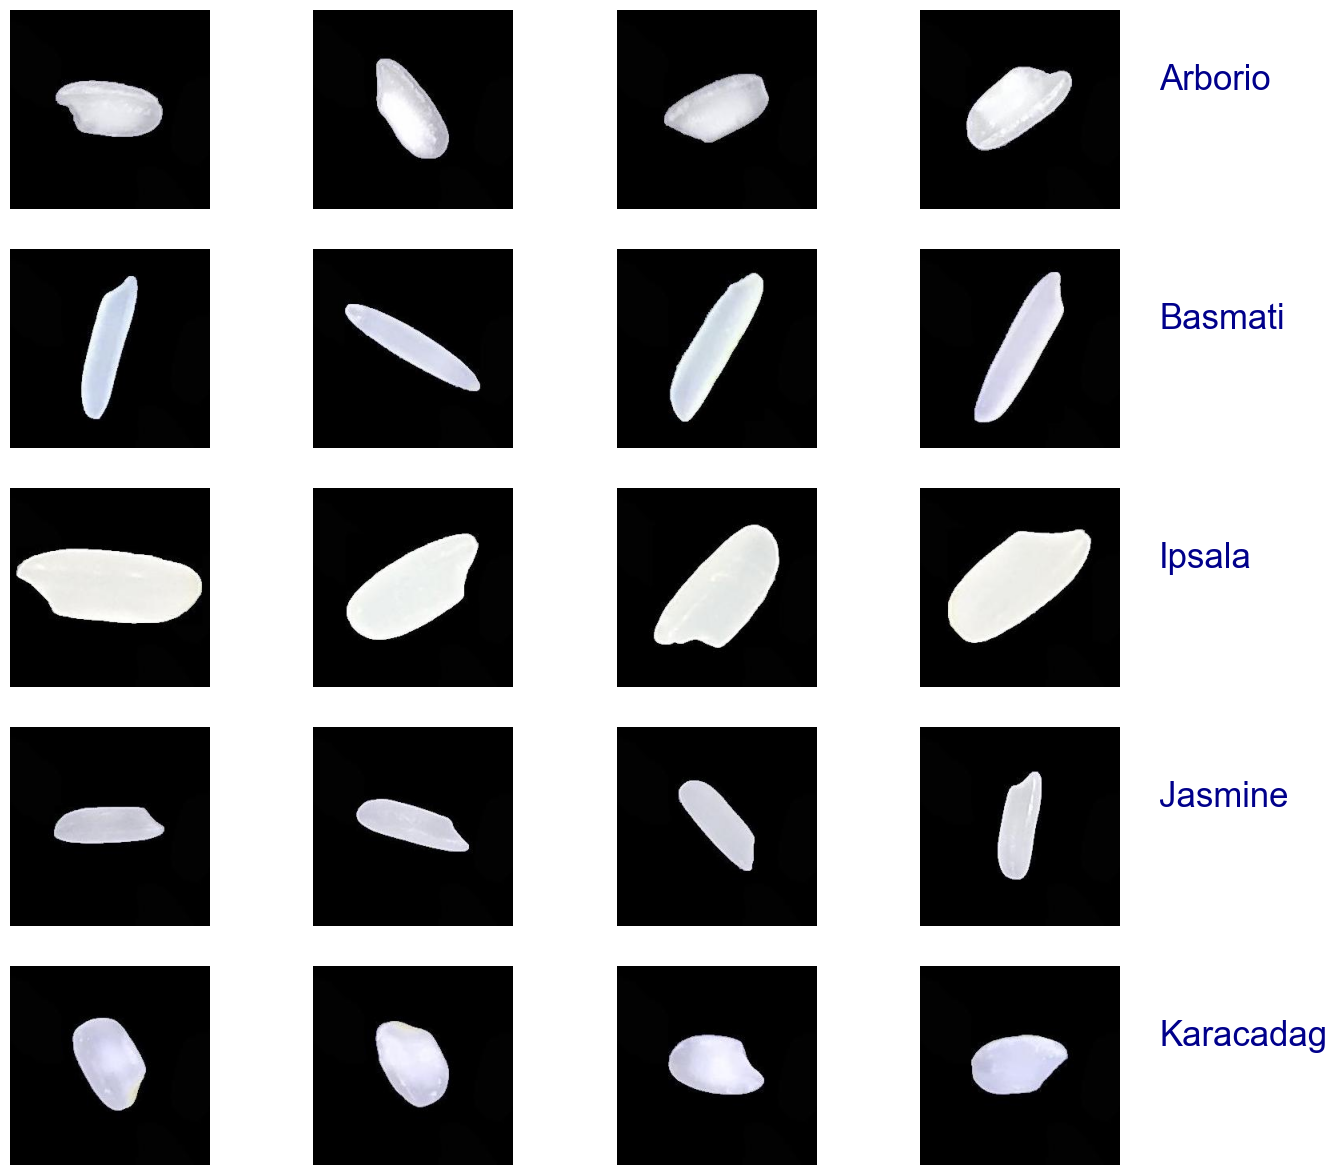

In [5]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

## <b>5 <span style='color:#2ae4f5'>|</span> Split Data into Train and Test </b> 
**I divided our data into two separate datasets:** the **training dataset** and the **testing dataset**. The training dataset consists of **80%** of the data, while the testing dataset contains the remaining **20%**.
To facilitate the training process, I applied the **LabelEncoder to labels**. This process allowed us to convert the rice types' labels, namely **'Arborio'**, **'Basmati'**, **'Ipsala'**, **'Jasmine'**, and **'Karacadag'**, into numerical values. By assigning integer values to the labels, we enabled the utilization of these labels as target variables during the training of our machine learning model.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## <b>6 <span style='color:#2ae4f5'>|</span> Data Augmentation </b> 
To streamline the preprocessing of our images, we took the following steps: 
- **we created generators for both the training and testing datasets.** These generators allow us to efficiently handle and manipulate the data during the training and testing phases.

- **to enhance the diversity and robustness of our training data, we applied data augmentation techniques specifically to the training dataset.** This augmentation process introduces variations in the images by applying transformations such as rotation, scaling, and flipping. By doing so, we expand the dataset and enable our model to learn from a wider range of image variations.

- **Additionally, we standardized the image dimensions by reshaping them to a uniform size of 50x50 pixels.** This resizing ensures that all images in the dataset have consistent dimensions, facilitating the subsequent processing and analysis stages.


In [10]:
#from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


## <b>6 <span style='color:#2ae4f5'>|</span> Training Model </b> 

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [12]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model on the training data
history = model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1536s 807ms/step - accuracy: 0.7411 - loss: 0.6210 - val_accuracy: 0.9380 - val_loss: 0.1612
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 579s 308ms/step - accuracy: 0.9400 - loss: 0.1630 - val_accuracy: 0.9626 - val_loss: 0.1005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 321s 171ms/step - accuracy: 0.9556 - loss: 0.1246 - val_accuracy: 0.9720 - val_loss: 0.0772
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 358s 190ms/step - accuracy: 0.9644 - loss: 0.0974 - val_accuracy: 0.9745 - val_loss: 0.0759
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 312s 166ms/step - accuracy: 0.9748 - loss: 0.0701 - val_accuracy: 0.9828 - val_loss: 0.0487


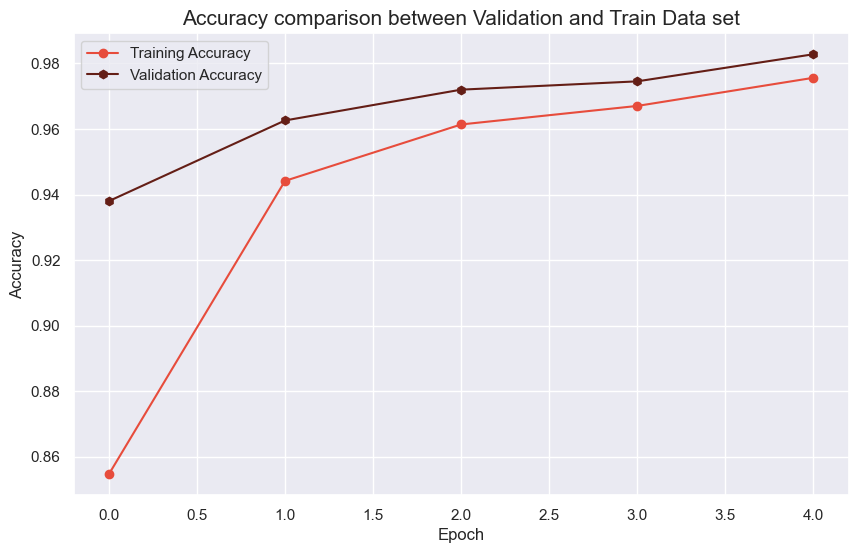

In [16]:
# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h', label='Validation Accuracy')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

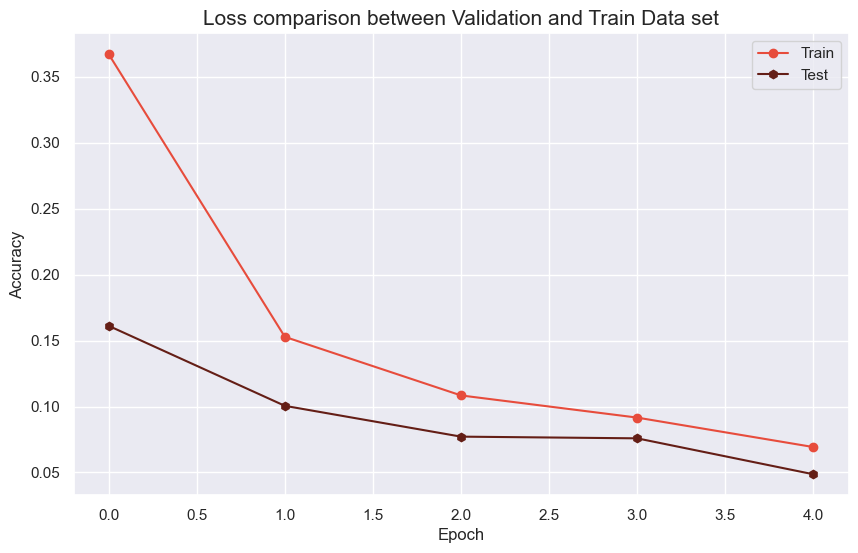

In [18]:
#Loss comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [19]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 182s 389ms/step - accuracy: 0.9835 - loss: 0.0464
Accuracy: 0.9830666780471802


## <b>9 <span style='color:#2ae4f5'>|</span> Save The Model </b> 

In [20]:
# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!
